# Wireless Intrusion Detection System

- Intrusion Detection Systems (IDS) provide means of identifying and possibly responding to a threat in a timely fashion.
- Dataset used: Subset of AWID-2: Format: CSV, Data points: 2371216, Features: 155, Classes: 17
- Aegean WiFi Intrusion Dataset (AWID) is a collection of sets of data in easily distributed format, which contain real traces of both normal and intrusive 802.11 traffic

## Attack Classes

1. ARP (Address Resolution Protocol): Associate the attacker's MAC address with the IP address of another host, such as the default gateway, causing any traffic meant for that IP address to be sent to the attacker instead.
2. Authentication: Flooding attack attempts to exhaust the physical resources of the APs.
3. AMOK: Flooding attack, like deauthentication
4. Beacon: Attacker fakes these beacon frames and sends them in large numbers to confuse the wireless clients.
5. Cafe-Latte: Obtain a WEP key from a client system, done by capturing an ARP packet from the client, manipulating it and sending it back to client, who in turn generates packets used to determine WEP key.
6. Chop-Chop: Works by taking one byte of data from a WEP encrypted packet, substituting values for that byte, and recalculating the encryption checksum.
7. RTS/CTS attack: is a type of low rate DoS attacks. RTS/CTS (Request to Send / Clear to Send) mechanism is a reservation scheme used in the wireless networks
8. Deauthentication: It is a DoS attack, that sends disassocate packets to one or more clients which are currently associated with a particular access point.
9. Disassociation: Targeted deauthentication attack
10. Evil-Twin: A fraudulent Wi-Fi access point that appears to be legitimate but is set up to eavesdrop on wireless communications.
11. Fragmentation: Aims at revealing a significant portion of the keystream by sending notably less messages than the ChopChop. Thekeystream can later be used to generate and inject packets into the network as part of other assaults.
12. Hirte: It is another method for retrieving the WEP key using solely a client and not needing an AP of the network at all. It works in a similar fashion to the Caffe Latte, but it incorporates methods found in the fragmentation attack.
13. Probe Request: Flooding attack aims at stressing the resources of an AP and eventually drive it to paralysis.
14. Probe Response: This flooding attack also takesadvantage of the Probe mechanism, it works in reverse by targeting the client rather than the AP.
15. Power Saving: DoS attack, it basically tricks the AP into thinking that a specific STA has fallen into doze mode.

## Data Loading

In [39]:
import numpy as np
import pandas as pd

def load_data(file_path):
    '''Fuction to load csv data file as dataframe from given file path'''
    df = pd.read_csv(file_path, header=None)
    return df

df = load_data('data/train.csv')
df.head()

C:\Users\yee80\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
3,0,?,0.0,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
4,0,?,0.0,1.393668e+09,0.000940,0.000940,0.010150,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


### Setting column names (wrt Wireshark)

In [40]:
def set_colnames(df):
    '''This function sets column names according to wireshark for given dataframe'''
    with open("data/columns.txt") as f:
        columns = [line.strip() for line in f]
    df.columns = columns
    return df

df = set_colnames(df)
df.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated,data.len,class
0,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
1,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
2,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
3,0,?,0.0,1.393668e+09,0.006015,0.006015,0.009210,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
4,0,?,0.0,1.393668e+09,0.000940,0.000940,0.010150,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


In [3]:
print('Shape of data: ', df.shape)

Shape of data:  (2371216, 155)


## EDA, FS, Cleaning

EDA = Exploratory Data Analysis, 
FS = Feature Selection

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371216 entries, 0 to 2371215
Columns: 155 entries, frame.interface_id to class
dtypes: float64(6), int64(39), object(110)
memory usage: 2.7+ GB


In [52]:
df.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,2371216.0,2371216.0,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2371216.0,2371216.0,...,2.371216e+06,2371216.0,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2.371216e+06,2371216.0
mean,0.0,0.0,1.393665e+09,2.024219e-03,2.024219e-03,1.541365e+03,5.164755e+02,5.164755e+02,0.0,0.0,...,2.519524e+01,0.0,1.312157e+00,8.329377e+00,8.332434e-03,1.124225e-01,1.895821e-02,2.521069e-03,5.056435e-01,0.0
std,0.0,0.0,2.496660e+03,6.366559e-03,6.366559e-03,9.727346e+02,6.653071e+02,6.653071e+02,0.0,0.0,...,2.322904e+01,0.0,7.949751e-01,4.332382e+00,9.090109e-02,3.158856e-01,1.363774e-01,5.014693e-02,4.999683e-01,0.0
min,0.0,0.0,1.393661e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,0.0,0.0,1.393663e+09,3.120000e-04,3.120000e-04,8.299017e+02,4.000000e+01,4.000000e+01,0.0,0.0,...,1.000000e+00,0.0,1.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.0,0.0,1.393663e+09,5.330000e-04,5.330000e-04,1.478642e+03,1.220000e+02,1.220000e+02,0.0,0.0,...,2.400000e+01,0.0,2.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
75%,0.0,0.0,1.393665e+09,1.110000e-03,1.110000e-03,2.145450e+03,1.552000e+03,1.552000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
max,0.0,0.0,1.393669e+09,3.502630e-01,3.502630e-01,3.599571e+03,1.570000e+03,1.570000e+03,0.0,0.0,...,5.400000e+01,0.0,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0


### Class Distribution

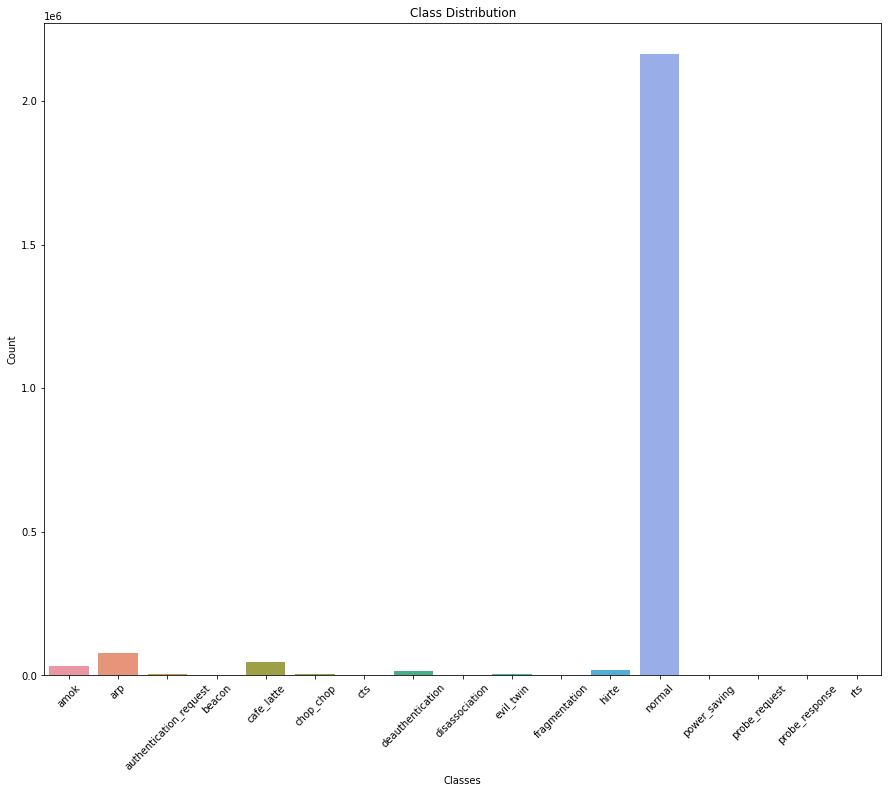

{'amok': 31657, 'arp': 78253, 'authentication_request': 3500, 'beacon': 2398, 'cafe_latte': 46268, 'chop_chop': 2871, 'cts': 1759, 'deauthentication': 14892, 'disassociation': 84, 'evil_twin': 3244, 'fragmentation': 937, 'hirte': 19089, 'normal': 2163973, 'power_saving': 165, 'probe_request': 369, 'probe_response': 1558, 'rts': 199}


In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

def class_distrib(df):
    '''This function displays class distribution as a bar plot for the given dataframe'''
    unique, counts = np.unique(df['class'], return_counts=True)
    distrib = dict(zip(unique, counts))

    plt.figure(figsize=(15, 12))
    sns.barplot(x=list(distrib.keys()), y=list(distrib.values()))
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.xlabel("Classes")
    plt.ylabel("Count")

    plt.show()
    print(distrib)
    
class_distrib(df)

- This is extremely unbalanced data, we need to downsample the normal class

### Down Sampling majority class

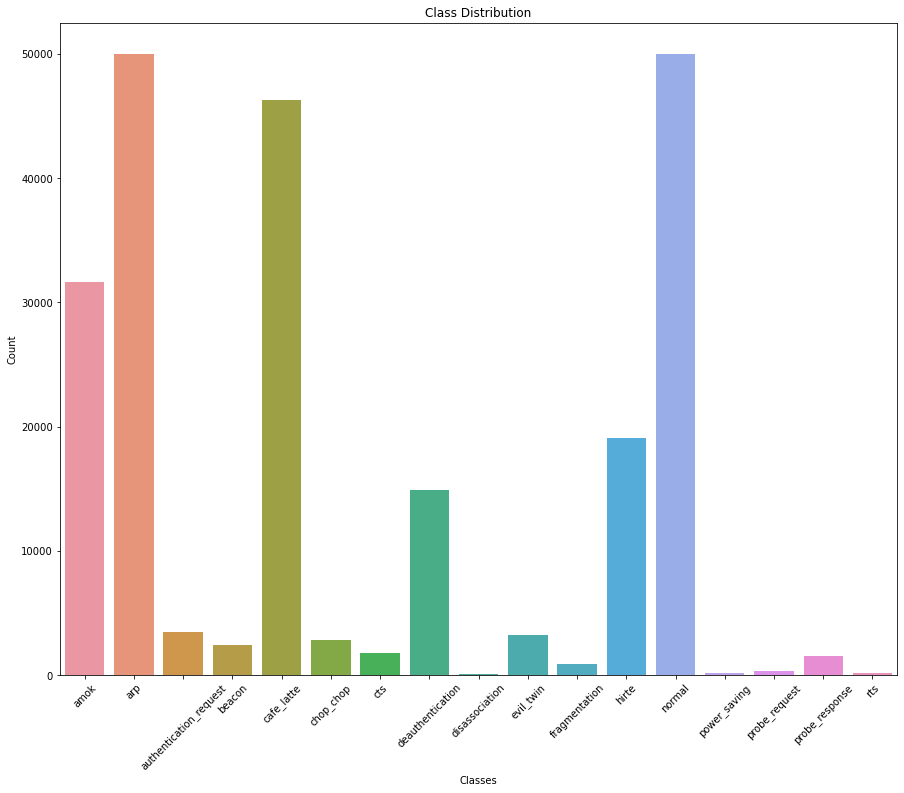

{'amok': 31657, 'arp': 50000, 'authentication_request': 3500, 'beacon': 2398, 'cafe_latte': 46268, 'chop_chop': 2871, 'cts': 1759, 'deauthentication': 14892, 'disassociation': 84, 'evil_twin': 3244, 'fragmentation': 937, 'hirte': 19089, 'normal': 50000, 'power_saving': 165, 'probe_request': 369, 'probe_response': 1558, 'rts': 199}


In [42]:
def down_sample(df, class_name, n):
    '''This function extracts n samples from the given dataframe for the given input class'''
    df_normal = df[df['class'] == class_name]
    df = df[df['class'] != class_name]

    df_normal = df_normal.sample(n=n, random_state=420)

    df = pd.concat([df_normal, df], axis=0)

    return df

df = down_sample(df, 'normal', 50000)
df = down_sample(df, 'arp', 50000)

#df = down_sample(df, 'amok', 3500)
#df = down_sample(df, 'cafe_latte', 3500)
#df = down_sample(df, 'arp', 3500)
#df = down_sample(df, 'deauthentication', 3500)
#df = down_sample(df, 'hirte', 3500)
#df = down_sample(df, 'normal', 3500)
class_distrib(df)

In [43]:
df.shape

(228990, 155)

### Shallow cleaning

In [44]:
def shallow_clean(df):
    '''Cleans the the given dataframe at a shallow level'''
    # Replace all '?' with NaNs
    df = df.replace('?', np.nan)

    # Remove columns with >= 85% NaNs
    thres_limit = len(df) * 0.25
    df = df.dropna(thresh=int(thres_limit), axis=1)

    # Remove columns with constant value
    df = df.drop(columns=df.columns[df.nunique()==1])

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df

def sub_shallow_clean(df):
    '''Cleans the the given dataframe at a sub shallow level'''
    # Replace all '?' with NaNs
    df = df.replace('?', np.nan)

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df


df = shallow_clean(df)

In [45]:
df.shape

(228990, 62)

### Feature selection by domain knowledge

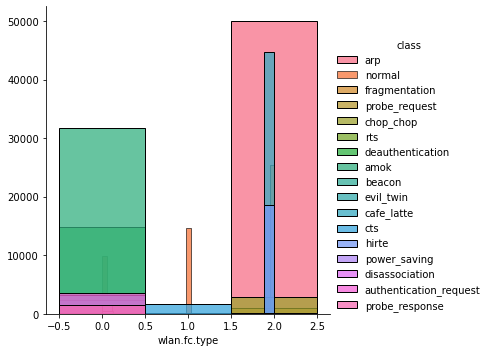

In [58]:
sns.FacetGrid(df, hue='class', height=5).map(sns.histplot, 'wlan.fc.type').add_legend()
plt.show()

In [46]:
relevant_columns = ['wlan.fc.type', 'wlan.fc.type_subtype', 'wlan.fc.subtype', 'wlan.fc.ds', 'frame.len', 'wlan.fc.protected', \
                    'wlan.duration', 'frame.time_delta_displayed', 'wlan.seq', 'class']
df = df[relevant_columns]
df.head(3)

,wlan.fc.type,wlan.fc.type_subtype,wlan.fc.subtype,wlan.fc.ds,frame.len,wlan.fc.protected,wlan.duration,frame.time_delta_displayed,wlan.seq,class
2026223,2,0x20,0,0x01,98,1,314,0.029302,839,arp
2035295,2,0x20,0,0x01,98,1,314,0.001360,384,arp
1984500,2,0x20,0,0x01,98,1,314,0.001055,1841,arp


## Pre-processing

### Replace NaNs

All class rows which still have some NaN value:  16632
Normal class rows which still have some NaN value:  14674


<ipython-input-47-b89ae7b466b4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']


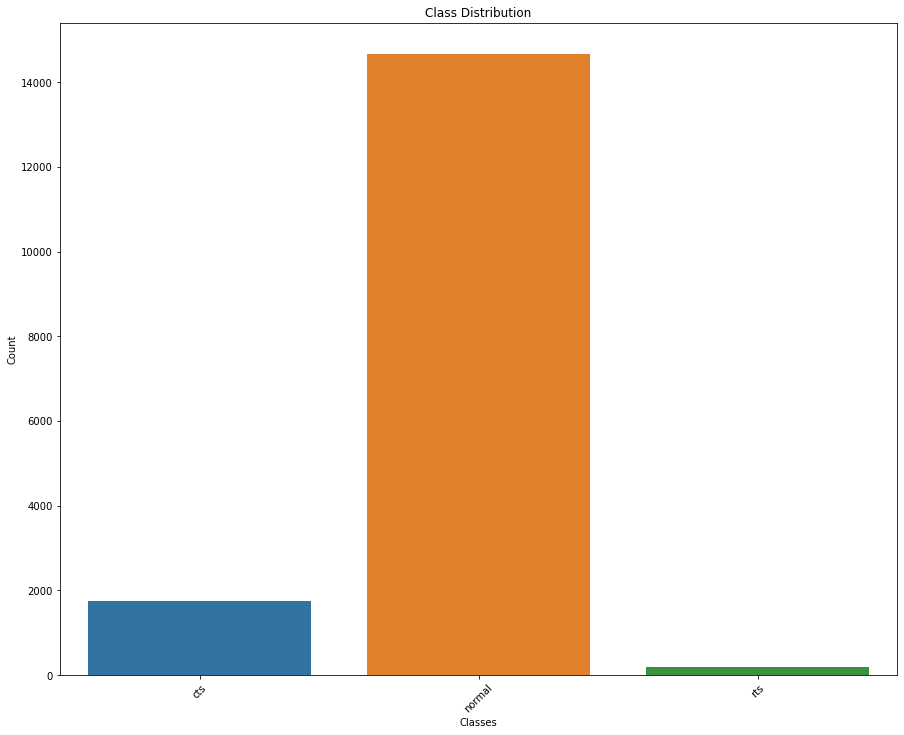

{'cts': 1759, 'normal': 14674, 'rts': 199}


wlan.fc.type                  False
wlan.fc.type_subtype          False
wlan.fc.subtype               False
wlan.fc.ds                    False
frame.len                     False
wlan.fc.protected             False
wlan.duration                  True
frame.time_delta_displayed    False
wlan.seq                       True
class                         False
dtype: bool

In [47]:
# Rows which still have some NaN value 
df_nan_rows = df[df.isnull().any(axis=1)]
print('All class rows which still have some NaN value: ', len(df_nan_rows))

df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']
print('Normal class rows which still have some NaN value: ', len(df_nan_rows_normal))

class_distrib(df_nan_rows)
df.isna().any()

In [48]:
#Fill the NULL values
def fill_nulls(df):
    '''Fills all null entries'''
    null_cols = list(df.columns[df.isna().any()])
    for c in null_cols:
        df[c] = df[c].apply(pd.to_numeric, errors='ignore')
        df[c] = df[c].fillna(value=df[c].mean())
    return df

df = fill_nulls(df)
df_nan_rows = df[df.isnull().any(axis=1)]
df_nan_rows

,wlan.fc.type,wlan.fc.type_subtype,wlan.fc.subtype,wlan.fc.ds,frame.len,wlan.fc.protected,wlan.duration,frame.time_delta_displayed,wlan.seq,class


### Write relevant features to file

In [49]:
relevant_columns = df.columns
with open('data/relevant_columns.txt', 'w') as f:
    [f.write(rc+'\n') for rc in relevant_columns]

### Analysing object type data

In [50]:
df.dtypes

wlan.fc.type                    int64
wlan.fc.type_subtype           object
wlan.fc.subtype                 int64
wlan.fc.ds                     object
frame.len                       int64
wlan.fc.protected               int64
wlan.duration                 float64
frame.time_delta_displayed    float64
wlan.seq                      float64
class                          object
dtype: object

In [51]:
object_cols = list(df.select_dtypes(['object']))
print('Unique category counts: ')
for c in object_cols:
    print(c, '=>', df[c].value_counts().count())

Unique category counts: 
wlan.fc.type_subtype => 20
wlan.fc.ds => 3
class => 17


In [52]:
def to_numeric_dtype(df):
    to_num_cols = ['frame.time_delta_displayed', 'frame.len', 'wlan.duration', 'wlan.seq']
    for oc in to_num_cols:
        df[oc] = df[oc].apply(pd.to_numeric, errors='ignore')
    return df

df = to_numeric_dtype(df)

In [53]:
# Save processed data to file
df.to_csv('data/train_processed.csv', index=False)

In [3]:
# Load processed data to df
df = pd.read_csv('data/train_processed.csv')

### Standardizing

In [54]:
X = df.drop(['class'], axis=1)
y = df['class']

In [55]:
from sklearn.preprocessing import StandardScaler
import joblib

std_cols =  ['frame.time_delta_displayed', 'frame.len', 'wlan.duration', 'wlan.seq']
with open('scaler_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in std_cols]

standard_scaler = StandardScaler()
X[std_cols] = standard_scaler.fit_transform(X[std_cols])

# Save this scalar to file
joblib.dump(standard_scaler, 'scaler_save/scaler.gz')

['scaler_save/scaler.gz']

### One-hot encoding (BoW)

In [56]:
from sklearn.preprocessing import OneHotEncoder

enc_cols = ['wlan.fc.type_subtype', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.protected']

with open('encoder_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in enc_cols]
    
oh_encoder_x = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_ohe = oh_encoder_x.fit_transform(X[enc_cols])
df_ohe = pd.DataFrame(array_ohe, index=df.index)

#Extract only the columns that didnt need to be encoded
df_other = X.drop(columns=enc_cols)

#Concatenate the two dataframes : 
X = pd.concat([df_ohe, df_other], axis=1)

# Save this encoder to file
joblib.dump(oh_encoder_x, 'encoder_save/encoder_x.gz')

['encoder_save/encoder_x.gz']

In [57]:
print('Shape of y before encoding: ', y.shape)
print('ReShape of y for encoding: ', y.values.reshape(-1, 1).shape)

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_categorical = oh_encoder.fit_transform(y.values.reshape(-1, 1))
print('Shape of y after encoding: ', y_categorical.shape)

# Save this encoder to file
joblib.dump(oh_encoder, 'encoder_save/encoder_y.gz')

Shape of y before encoding:  (228990,)
ReShape of y for encoding:  (228990, 1)
Shape of y after encoding:  (228990, 17)


['encoder_save/encoder_y.gz']

### Up sampling minority class

In [58]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Before up-sampling:', len(y_categorical))

over_sampler = SMOTE()
X, y_categorical = over_sampler.fit_resample(X, y_categorical)

print('\nAfter up-sampling:', len(y_categorical))

Before up-sampling: 228990

After up-sampling: 850000


### Test train split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.33, stratify=y_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val)

### Writing class labels to file

In [60]:
class_labels = oh_encoder.categories_[0]
with open('data/class_labels.txt', 'w') as f:
    [f.write(cl+'\n') for cl in class_labels]

## Deep Learning Model

### Model definition

In [61]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def create_model(input_shape, n_class):
    """This function creates a simple DL model"""
    input_layer = tf.keras.Input(shape=(input_shape,))
    
    dense_layer1 = layers.Dense(16, activation='relu')(input_layer)
    dense_layer2 = layers.Dense(32, activation='relu')(dense_layer1)
    dense_layer3 = layers.Dense(32, activation='relu')(dense_layer2)
    
    output_layer = layers.Dense(n_class, activation='softmax')(dense_layer3)
    return Model(input_layer, output_layer)
    
model = create_model(X_train.shape[1], len(oh_encoder.categories_[0]))

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 44)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                720       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 17)                561       
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


### Setting model optimizers and callbacks

In [62]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
%load_ext tensorboard

log_dir="tensorboard\\logs"
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

checkpoint = ModelCheckpoint(filepath='model_save/best_model.h5', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Model training

In [64]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
              batch_size=128, callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/10
4422/4450 [============================>.] - ETA: 0s - loss: 0.2796 - accuracy: 0.9169
Epoch 00001: val_accuracy improved from -inf to 0.95726, saving model to model_save/best_model.h5
4450/4450 [==============================] - 7s 1ms/step - loss: 0.2787 - accuracy: 0.9171 - val_loss: 0.1251 - val_accuracy: 0.9573
Epoch 2/10
4445/4450 [============================>.] - ETA: 0s - loss: 0.0985 - accuracy: 0.9684
Epoch 00002: val_accuracy improved from 0.95726 to 0.97652, saving model to model_save/best_model.h5
4450/4450 [==============================] - 5s 1ms/step - loss: 0.0985 - accuracy: 0.9684 - val_loss: 0.0772 - val_accuracy: 0.9765
Epoch 3/10
4410/4450 [============================>.] - ETA: 0s - loss: 0.0697 - accuracy: 0.9793
Epoch 00003: val_accuracy improved from 0.97652 to 0.97976, saving model to model_save/best_model.h5
4450/4450 [==============================] - 6s 1ms/step - loss: 0.0696 - accuracy: 0.9793 - val_loss: 0.0658 - val_accuracy: 0.9798
Epoch 4

### Model performance

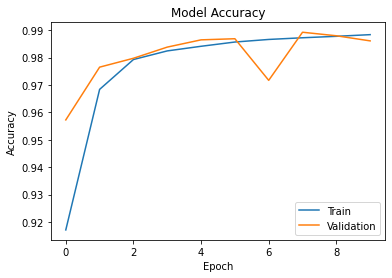

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Model results

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

y_preds_val = np.argmax(model.predict(X_val), axis=1)
y_val = np.argmax(y_val, axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)
y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_train = np.argmax(y_train, axis=1)

with open('data/class_labels.txt', 'r') as f:
    class_labels = np.array([line.strip() for line in f])

cm_val = confusion_matrix(class_labels[y_val], class_labels[y_preds_val])
cm_test = confusion_matrix(class_labels[y_test], class_labels[y_preds_test])
cm_train = confusion_matrix(class_labels[y_train], class_labels[y_preds_train])

df_cm_val = pd.DataFrame(cm_val, columns=class_labels, index=class_labels)
df_cm_train = pd.DataFrame(cm_train, columns=class_labels, index=class_labels)
df_cm_test = pd.DataFrame(cm_test, columns=class_labels, index=class_labels)
df_cm_val.index.name = df_cm_train.index.name = df_cm_test.index.name = 'Actual'
df_cm_val.columns.name = df_cm_train.columns.name = df_cm_test.columns.name = 'Predicted'

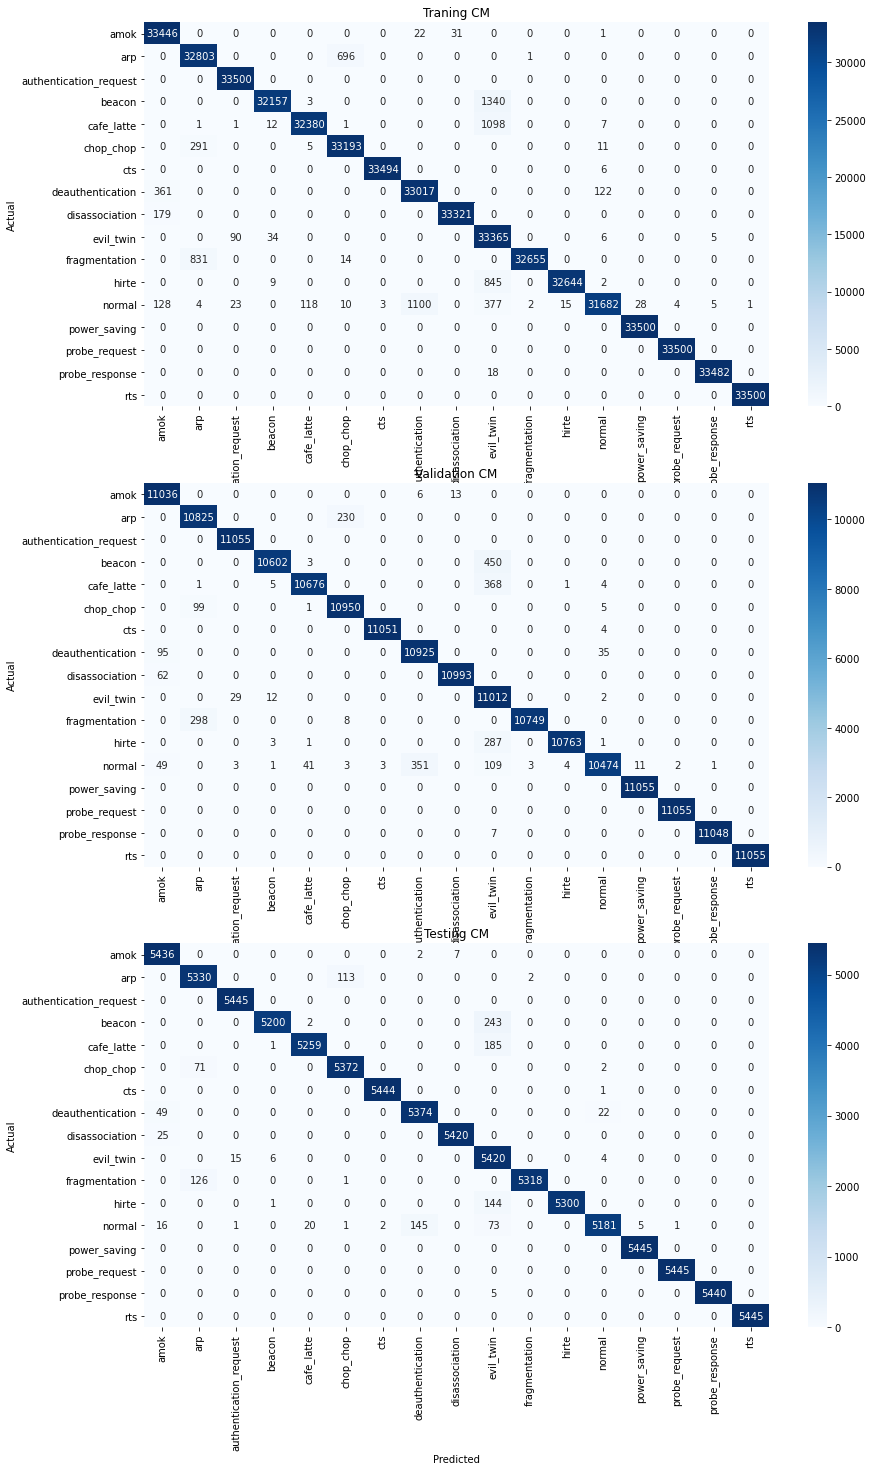

In [67]:
fig = plt.figure(figsize = (14, 24))

fig.add_subplot(3, 1, 1)
sp2 = sns.heatmap(df_cm_train, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Traning CM')

fig.add_subplot(3, 1, 2)
sp1 = sns.heatmap(df_cm_val, cmap="Blues", annot=True, fmt='g')
sp1.set_title('Validation CM')

fig.add_subplot(3, 1, 3)
sp2 = sns.heatmap(df_cm_test, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Testing CM')

plt.show()

In [68]:
print(classification_report(class_labels[y_val], class_labels[y_preds_val], target_names=list(class_labels)))
print(classification_report(class_labels[y_test], class_labels[y_preds_test], target_names=list(class_labels)))

                        precision    recall  f1-score   support

                  amok       0.98      1.00      0.99     11055
                   arp       0.96      0.98      0.97     11055
authentication_request       1.00      1.00      1.00     11055
                beacon       1.00      0.96      0.98     11055
            cafe_latte       1.00      0.97      0.98     11055
             chop_chop       0.98      0.99      0.98     11055
                   cts       1.00      1.00      1.00     11055
      deauthentication       0.97      0.99      0.98     11055
        disassociation       1.00      0.99      1.00     11055
             evil_twin       0.90      1.00      0.95     11055
         fragmentation       1.00      0.97      0.99     11055
                 hirte       1.00      0.97      0.99     11055
                normal       1.00      0.95      0.97     11055
          power_saving       1.00      1.00      1.00     11055
         probe_request       1.00      

## Model Evaluation for Testing Data for different distribution

### Complete pre-processing of testing data

In [69]:
def preprocess_test_data(path):
    with open('data/relevant_columns.txt', 'r') as f:
        relevant_cols = [line.strip() for line in f]
        
    with open('data/class_labels.txt', 'r') as f:
        class_labels = np.array([line.strip() for line in f])
        
    with open('scaler_save/columns.txt', 'r') as f:
        std_cols = [line.strip() for line in f]
        
    with open('encoder_save/columns.txt', 'r') as f:
        enc_cols = [line.strip() for line in f]
        
    df = load_data(path)
    print('(+) Test data loaded')
    
    df = set_colnames(df)
    print('(+) Column names set')
    
    df = df[relevant_cols]
    print('(+) Relevant columns extracted')
    
    df = sub_shallow_clean(df)
    print('(+) Test data shallow cleaned')
    
    df = fill_nulls(df)
    print('(+) NULL entries removed')

    df = to_numeric_dtype(df)
    print('(+) Numeric dtypes parsed')
    
    X_test = df.drop(['class'], axis=1)
    y_test = df['class']
    
    std_scaler = joblib.load('scaler_save/scaler.gz')
    X_test[std_cols] = std_scaler.transform(X_test[std_cols])
    print('(+) Testing data standardized')
    
    oh_encoder = joblib.load('encoder_save/encoder_x.gz')
    array_ohe = oh_encoder_x.transform(X_test[enc_cols])
    df_ohe = pd.DataFrame(array_ohe, index=df.index)
    df_other = X_test.drop(columns=enc_cols)
    X_test = pd.concat([df_ohe, df_other], axis=1)
    print('(+) Testing data encoded')
    
    oh_encoder = joblib.load('encoder_save/encoder_y.gz')
    y_test_categorical = oh_encoder.transform(y_test.values.reshape(-1, 1))
    print('(+) Class data encoded')
    
    return (X_test, y_test, y_test_categorical)

X_test, y_test, y_test_categorical =  preprocess_test_data('data/test1.csv')
print('(+) Processing completed')

C:\Users\yee80\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(+) Test data loaded
(+) Column names set
(+) Relevant columns extracted
(+) Test data shallow cleaned
(+) NULL entries removed
(+) Numeric dtypes parsed
(+) Testing data standardized
(+) Testing data encoded
(+) Class data encoded
(+) Processing completed


### Load model

In [70]:
from tensorflow.keras.models import load_model

model = load_model('model_save/best_model.h5')

### Model results

In [71]:
y_preds_test = np.argmax(model.predict(X_test), axis=1)
y_actual_test = np.argmax(y_test_categorical, axis=1)

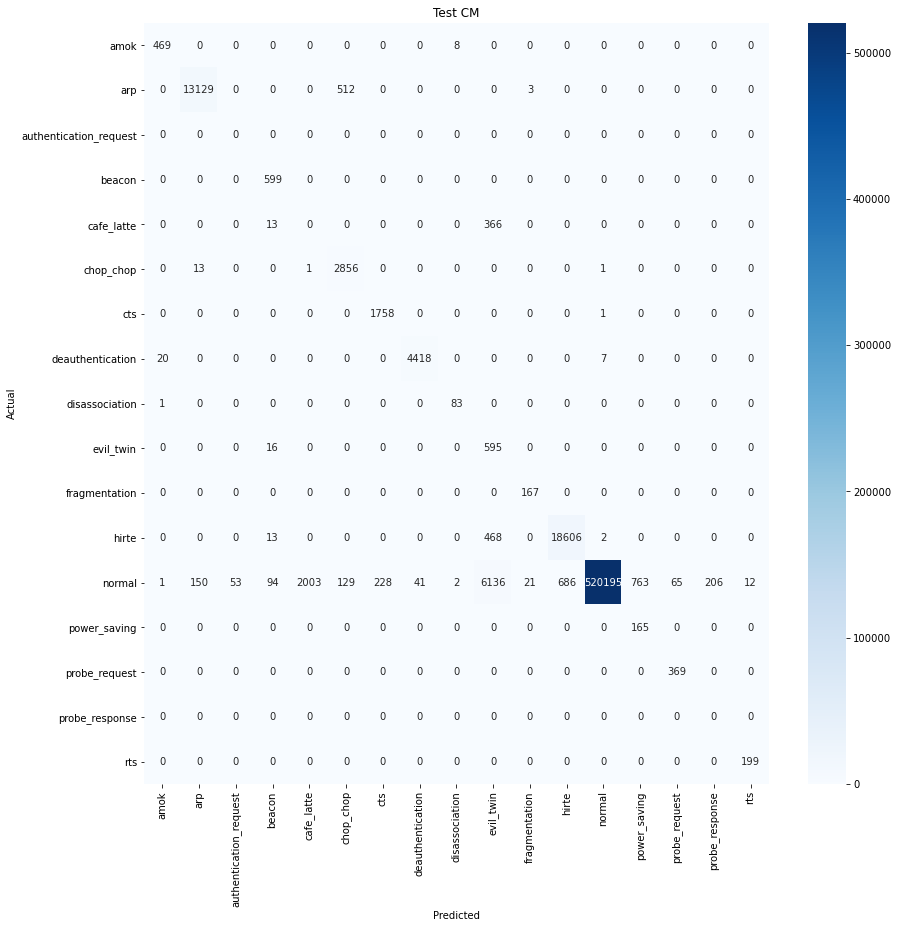

C:\Users\yee80\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm_test = confusion_matrix(class_labels[y_actual_test], class_labels[y_preds_test], labels=class_labels)

df_cm_test = pd.DataFrame(cm_test, columns=class_labels, index=class_labels)
df_cm_test.index.name = 'Actual'
df_cm_test.columns.name = 'Predicted'

fig = plt.figure(figsize = (14, 14))
sns.heatmap(df_cm_test, cmap="Blues", annot=True, fmt='g')
plt.title('Test CM')
plt.show()

print(classification_report(class_labels[y_actual_test], class_labels[y_preds_test], \
                            target_names=list(class_labels), labels=list(class_labels)))